# Import Packages

In [1]:
# Data Analysis
import numpy as np
import pandas as pd
import random as rn
from sklearn.feature_selection import mutual_info_classif

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Machine Learning Models
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, GaussianNB, CategoricalNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score

# Options

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

sns.set(rc={'figure.figsize':(16,10)})
sns.set_style("white")

# Acquiring Data

In [3]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

# Analysis

In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()
print('-' * 50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [7]:
# Numeric Columns
percentiles = np.arange(0, 1, 0.05, dtype='float')
train_df.describe(list(percentiles.round(2)))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
0%,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
5%,45.500000,0.000000,1.000000,4.000000,0.000000,0.000000,7.225000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
15%,134.500000,0.000000,1.000000,17.000000,0.000000,0.000000,7.750000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400


In [8]:
# Object Columns
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
# Correlation Checking
print(train_df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Pclass', ascending=True))
print('-' * 50)
print(train_df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Sex', ascending=True))
print('-' * 50)
print(train_df[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='SibSp', ascending=True))
print('-' * 50)
print(train_df[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Parch', ascending=True))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
--------------------------------------------------
      Sex  Survived
0  female  0.742038
1    male  0.188908
--------------------------------------------------
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
--------------------------------------------------
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


# Visualizations

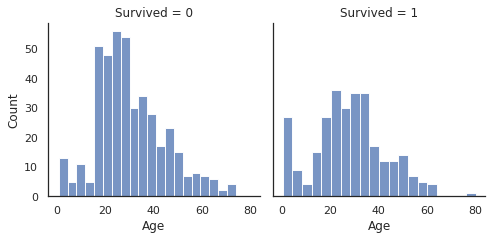

In [10]:
grid = sns.FacetGrid(train_df, col='Survived', height=3.5)
grid.map(sns.histplot, 'Age', bins=20)

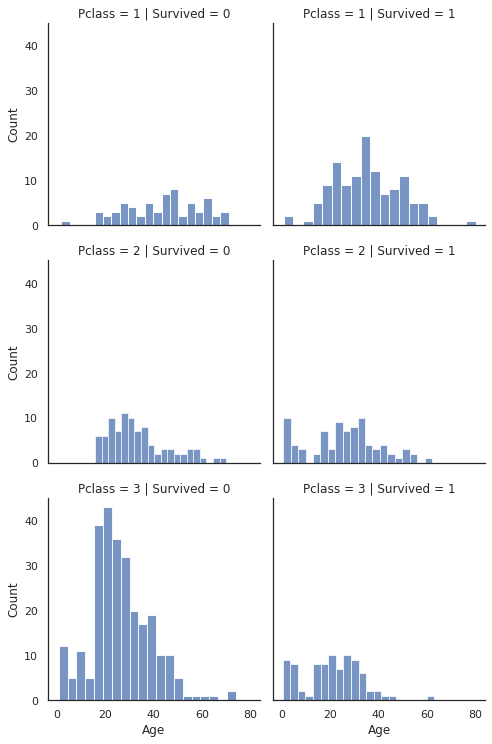

In [11]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=3.5)
grid.map(sns.histplot, 'Age', bins=20)

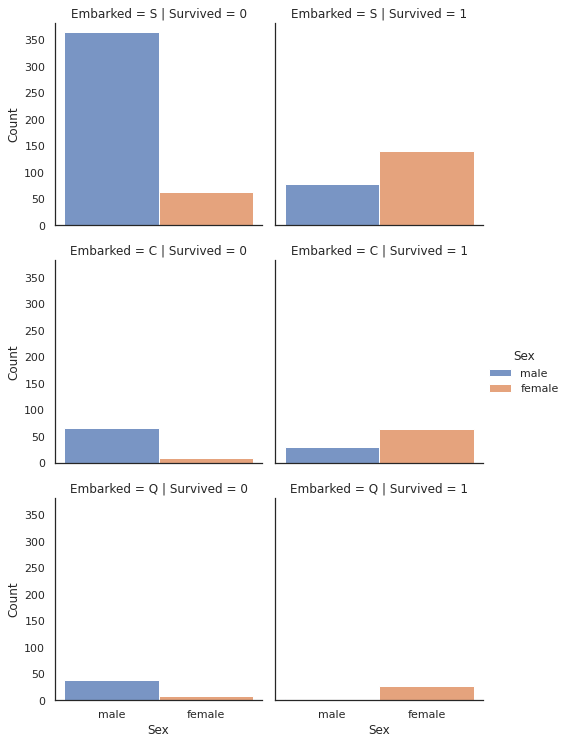

In [12]:
grid = sns.FacetGrid(train_df, col='Survived', row='Embarked', hue='Sex', height=3.5)
grid.map(sns.histplot, 'Sex')
grid.add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


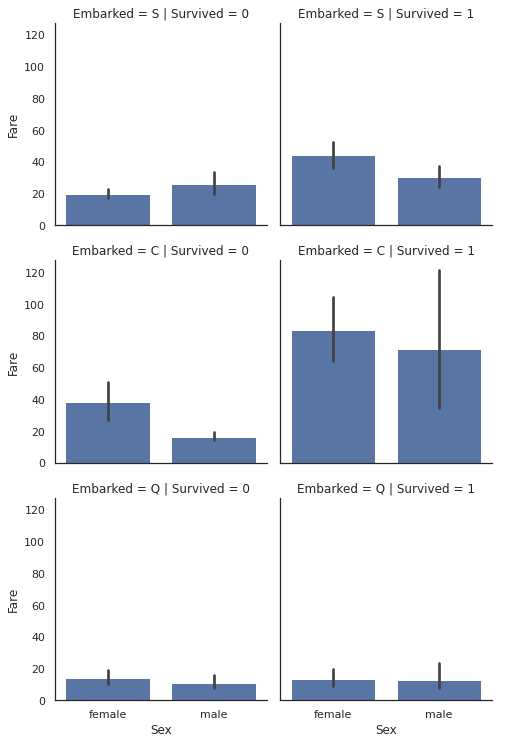

In [13]:
grid = sns.FacetGrid(train_df, col='Survived', row='Embarked', height=3.5)
grid.map(sns.barplot, 'Sex', 'Fare')
grid.add_legend()

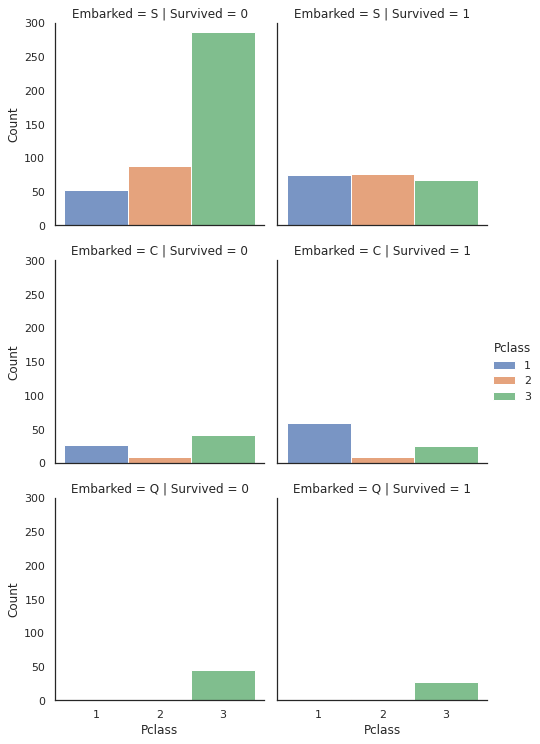

In [14]:
grid = sns.FacetGrid(train_df, col='Survived', row='Embarked', hue='Pclass', height=3.5)
grid.map(sns.histplot, 'Pclass')
grid.add_legend()

# Wrangling Data

In [15]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [16]:
train_df['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir', 'Dona'], 'Rare', inplace=True)
train_df['Title'].replace('Master', 'Mr', inplace=True)
train_df['Title'].replace('Ms', 'Miss', inplace=True)
train_df['Title'].replace('Mlle', 'Miss', inplace=True)
train_df['Title'].replace('Mme', 'Mrs', inplace=True)

test_df['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir', 'Dona'], 'Rare', inplace=True)
test_df['Title'].replace('Master', 'Mr', inplace=True)
test_df['Title'].replace('Ms', 'Miss', inplace=True)
test_df['Title'].replace('Mlle', 'Miss', inplace=True)
test_df['Title'].replace('Mme', 'Mrs', inplace=True)

In [17]:
train_df[['Title', 'Survived']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Miss,0.702703
1,Mr,0.186715
2,Mrs,0.793651
3,Rare,0.347826


In [18]:
null_num_cols = ['Age', 'Fare']
num_imputer = KNNImputer()

tmp_tr_df = pd.DataFrame(num_imputer.fit_transform(train_df[null_num_cols]))
tmp_tr_df.columns = null_num_cols
train_df[null_num_cols] = tmp_tr_df[null_num_cols]

tmp_te_df = pd.DataFrame(num_imputer.transform(test_df[null_num_cols]))
tmp_te_df.columns = null_num_cols
test_df[null_num_cols] = tmp_te_df[null_num_cols]


emb_imputer = SimpleImputer(strategy='most_frequent')

tmp_tr_df = pd.DataFrame(emb_imputer.fit_transform(train_df[['Embarked']]))
tmp_tr_df.columns = ['Embarked']
train_df[['Embarked']] = tmp_tr_df[['Embarked']]


print(train_df.info())
print('-' * 50)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  

In [19]:
age_bands = pd.cut(train_df['Age'], 10)
result = age_bands.to_frame().join(train_df['Survived'], how='inner').groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(result)

                Age  Survived
0     (0.34, 8.378]  0.666667
9    (72.042, 80.0]  0.500000
6  (48.168, 56.126]  0.479167
1   (8.378, 16.336]  0.395833
4   (32.252, 40.21]  0.377358
7  (56.126, 64.084]  0.375000
2  (16.336, 24.294]  0.362245
5   (40.21, 48.168]  0.354430
3  (24.294, 32.252]  0.349265
8  (64.084, 72.042]  0.000000


In [20]:
fare_bands = pd.cut(train_df['Fare'], 4)
result = fare_bands.to_frame().join(train_df['Survived'], how='inner').groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(result)

                 Fare  Survived
3  (384.247, 512.329]  1.000000
1  (128.082, 256.165]  0.724138
2  (256.165, 384.247]  0.666667
0   (-0.512, 128.082]  0.368113


In [21]:
# Cannot use one hot encoder to directly encode age_bands and fare_babnds; because transforming the test dataset, firstly needs this data to be cut into bins 
# which pattern should learned by the training dataset; not possible.

for df in [train_df, test_df]:
    df.loc[ df['Age'] <= 8, 'Age'] = 0
    df.loc[(df['Age'] > 8) & (df['Age'] <= 16), 'Age'] = 1
    df.loc[(df['Age'] > 16) & (df['Age'] <= 24), 'Age'] = 2
    df.loc[(df['Age'] > 24) & (df['Age'] <= 32), 'Age'] = 3
    df.loc[(df['Age'] > 32) & (df['Age'] <= 40), 'Age'] = 4
    df.loc[(df['Age'] > 40) & (df['Age'] <= 48), 'Age'] = 5
    df.loc[(df['Age'] > 48) & (df['Age'] <= 56), 'Age'] = 6
    df.loc[(df['Age'] > 56) & (df['Age'] <= 64), 'Age'] = 7
    df.loc[(df['Age'] > 64) & (df['Age'] <= 72), 'Age'] = 8
    df.loc[ df['Age'] > 72, 'Age'] = 9
    
    df.loc[ df['Fare'] <= 128, 'Fare'] = 0
    df.loc[(df['Fare'] > 128) & (df['Fare'] <= 256), 'Fare'] = 1
    df.loc[(df['Fare'] > 256) & (df['Fare'] <= 384), 'Fare'] = 2
    df.loc[ df['Fare'] > 384, 'Fare'] = 3

# Dropping Unnecessary Columns

In [22]:
train_df.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
test_df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

print(' train_df shape: {} \n test_df shape: {}'.format(train_df.shape, test_df.shape))

 train_df shape: (891, 9) 
 test_df shape: (418, 9)


# One-Hot Encoding Categorical (and Ordinal) Features

In [23]:
cat_cols = ['Title', 'Sex', 'Embarked', 'Age', 'Pclass', 'Fare']
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

oh_cols_train = pd.DataFrame(oh_encoder.fit_transform(train_df[cat_cols]))
oh_cols_test = pd.DataFrame(oh_encoder.transform(test_df[cat_cols]))

oh_cols_train.index = train_df.index
oh_cols_train.columns = oh_encoder.get_feature_names_out(cat_cols)
oh_cols_test.index = test_df.index
oh_cols_test.columns = oh_encoder.get_feature_names_out(cat_cols)

num_train = train_df.drop(cat_cols, axis=1)
num_test = test_df.drop(cat_cols, axis=1)

oh_train_df = pd.concat([num_train, oh_cols_train], axis=1)
oh_test_df = pd.concat([num_test, oh_cols_test], axis=1)

# oh_train_df.sample(10)
oh_test_df.sample(10)

,PassengerId,SibSp,Parch,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Age_5.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0,Pclass_1,Pclass_2,Pclass_3,Fare_0.0,Fare_1.0,Fare_2.0,Fare_3.0
8,900,0,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
415,1307,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
123,1015,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
290,1182,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
384,1276,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
18,910,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
373,1265,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
369,1261,0,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
21,913,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
149,1041,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


# Further Analysis

<AxesSubplot:xlabel='MI Scores'>

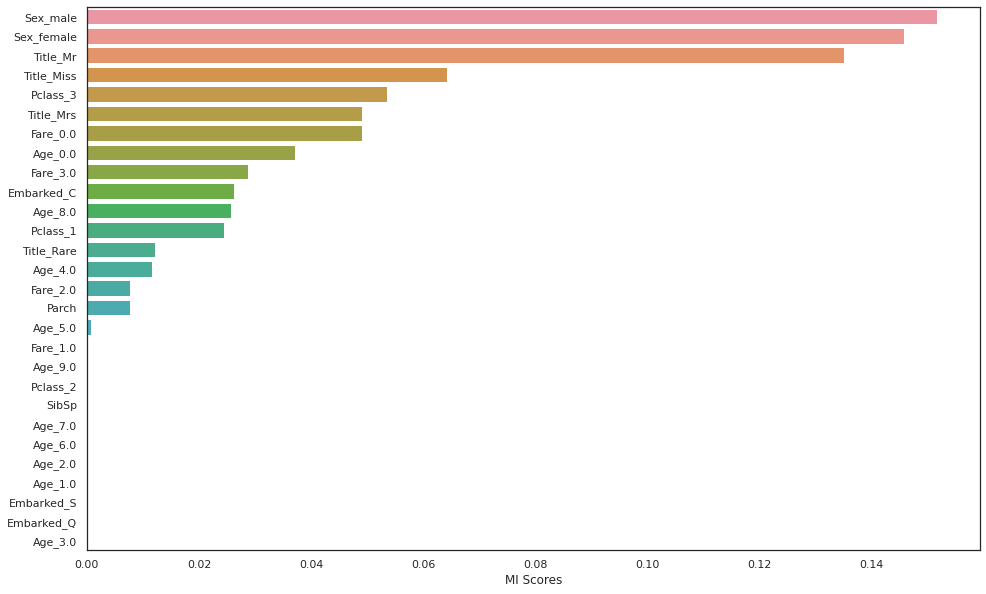

In [24]:
mi_scores = pd.Series(mutual_info_classif(X=oh_train_df.drop('Survived', axis=1), y=oh_train_df.loc[:,'Survived'], discrete_features='auto'),
                      name='MI Scores', index=oh_train_df.drop('Survived', axis=1).columns).sort_values(ascending=False)
sns.barplot(x=mi_scores, y=mi_scores.index)

In [25]:
# Hmmm, maybe it's reasonable to add at least one new feature based on Parch and SibSp

oh_train_df['FamilyOnboard'] = oh_train_df['Parch'] + oh_train_df['SibSp'] + 1
oh_test_df['FamilyOnboard'] = oh_test_df['Parch'] + oh_test_df['SibSp'] + 1

print(oh_train_df[['FamilyOnboard', 'Survived']].groupby(['FamilyOnboard'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   FamilyOnboard  Survived
3              4  0.724138
2              3  0.578431
1              2  0.552795
6              7  0.333333
0              1  0.303538
4              5  0.200000
5              6  0.136364
7              8  0.000000
8             11  0.000000


In [26]:
# No need to keep Parch and SibSp
oh_train_df.drop(['Parch', 'SibSp'], axis=1, inplace=True)
oh_test_df.drop(['Parch', 'SibSp'], axis=1, inplace=True)

print(' train_df shape: {} \n test_df shape: {}'.format(oh_train_df.shape, oh_test_df.shape))

 train_df shape: (891, 28) 
 test_df shape: (418, 28)


<AxesSubplot:xlabel='MI Scores'>

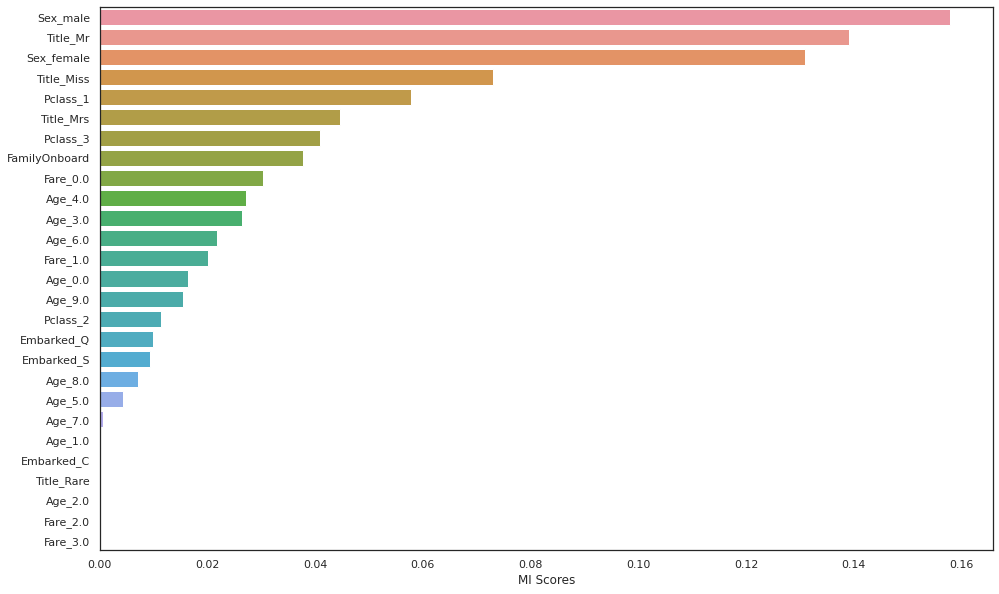

In [27]:
mi_scores = pd.Series(mutual_info_classif(X=oh_train_df.drop('Survived', axis=1), y=oh_train_df.loc[:,'Survived'], discrete_features='auto'),
                      name='MI Scores', index=oh_train_df.drop('Survived', axis=1).columns).sort_values(ascending=False)
sns.barplot(x=mi_scores, y=mi_scores.index)

# Evaluating Different Models

In [28]:
X = oh_train_df.drop('Survived', axis=1)
y = oh_train_df.loc[:,'Survived']

X_test = oh_test_df.drop('PassengerId', axis=1)

In [29]:
Models = [LogisticRegression, SGDClassifier, Perceptron, SVC, LinearSVC, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
          KNeighborsClassifier, BernoulliNB, ComplementNB, GaussianNB, CategoricalNB, MultinomialNB, DecisionTreeClassifier, XGBClassifier]

model_names = ['Logistic Regression', 'Stochastic Gradient Descent', 'Perceptron', 'SVM', 'Linear SVM', 'Random Forest', 'Adaboost', 'Gradient Boosting', 'KNN',
               'Bernoulli NB', 'Complement NB', 'Gaussian NB', 'Categorical NB', 'Multinomial NB', 'Decision Tree', 'XGBoost']

scores = pd.DataFrame({'Model': [], 'Precision': [], 'Recall': [], 'F1': []})

i = 0
for Model in Models:
    model = Model()
    model.fit(X, y)
    y_pred = model.predict(X)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    scores = scores.append({'Model': model_names[i], 'Precision': precision, 'Recall': recall, 'F1': f1}, ignore_index=True)
    print('{} Model Trained!'.format(model_names[i]))
    i += 1

scores

Logistic Regression Model Trained!
Stochastic Gradient Descent Model Trained!
Perceptron Model Trained!
SVM Model Trained!


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Linear SVM Model Trained!
Random Forest Model Trained!
Adaboost Model Trained!
Gradient Boosting Model Trained!
KNN Model Trained!
Bernoulli NB Model Trained!
Complement NB Model Trained!
Gaussian NB Model Trained!
Categorical NB Model Trained!
Multinomial NB Model Trained!
Decision Tree Model Trained!
XGBoost Model Trained!


,Model,Precision,Recall,F1
0,Logistic Regression,0.792570,0.748538,0.769925
1,Stochastic Gradient Descent,0.849558,0.561404,0.676056
2,Perceptron,0.774691,0.733918,0.753754
3,SVM,0.817276,0.719298,0.765163
4,Linear SVM,0.801282,0.730994,0.764526
5,Random Forest,0.898649,0.777778,0.833856
6,Adaboost,0.780120,0.757310,0.768546
7,Gradient Boosting,0.875445,0.719298,0.789727
8,KNN,0.841751,0.730994,0.782473
9,Bernoulli NB,0.733945,0.701754,0.717489


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Stochastic Gradient Descent'),
  Text(2, 0, 'Perceptron'),
  Text(3, 0, 'SVM'),
  Text(4, 0, 'Linear SVM'),
  Text(5, 0, 'Random Forest'),
  Text(6, 0, 'Adaboost'),
  Text(7, 0, 'Gradient Boosting'),
  Text(8, 0, 'KNN'),
  Text(9, 0, 'Bernoulli NB'),
  Text(10, 0, 'Complement NB'),
  Text(11, 0, 'Gaussian NB'),
  Text(12, 0, 'Categorical NB'),
  Text(13, 0, 'Multinomial NB'),
  Text(14, 0, 'Decision Tree'),
  Text(15, 0, 'XGBoost')])

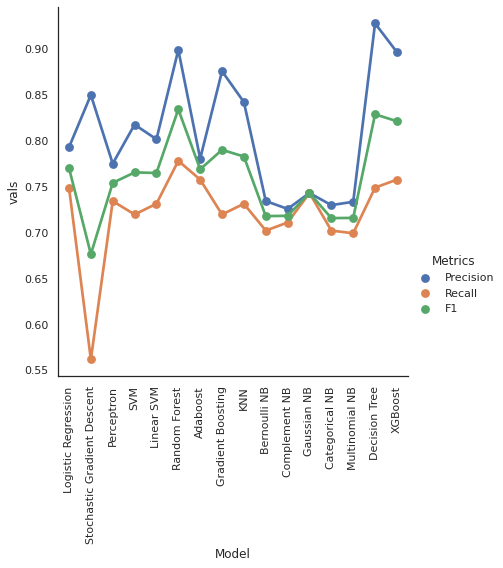

In [30]:
ax = sns.catplot(x='Model', y='vals', hue='Metrics', data=scores.melt('Model', var_name='Metrics', value_name='vals'), kind='point', height=6)
plt.xticks(rotation=90)

# Submission

In [31]:
rf_model = RandomForestClassifier()
rf_model.fit(X, y)
y_pred = rf_model.predict(X_test)

output = pd.DataFrame({
        "PassengerId": oh_test_df["PassengerId"],
        "Survived": y_pred
    })
output.to_csv('submission.csv', index=False)
print('Done!')

Done!
